In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model = joblib.load('model.pkl')
model

Pipeline(steps=[('norm', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=-1, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [3]:
data = pd.read_csv('data_hcl.csv')

In [4]:
data

,wavenumber,intensity,j,branch,pressure,temperature,fwhm,gamma,sigma,mean_wv,...,max_wv,min_wv,median_wv,mean_int,std_int,skew_int,kurtosis_int,max_int,min_int,median_int
0,5683.56703,0.87873,0,R37,145,293,0.068169,0.033105,0.004739,5683.566085,...,5683.61693,5683.51524,5683.566080,0.567632,0.204984,0.105487,-1.423795,0.87873,0.26557,0.549450
1,5701.98259,1.23987,1,R37,145,293,0.077525,0.037694,0.005280,5701.981648,...,5702.04003,5701.92327,5701.981650,0.805899,0.290988,0.084993,-1.431570,1.23987,0.37273,0.784530
2,5719.16744,1.36729,2,R37,145,293,0.080923,0.039601,0.004839,5719.166023,...,5719.22676,5719.10529,5719.166020,0.893575,0.319793,0.065195,-1.431605,1.36729,0.41227,0.874895
3,5735.10744,1.37998,3,R37,145,293,0.079175,0.038495,0.005394,5735.106026,...,5735.16488,5735.04717,5735.106030,0.903325,0.320822,0.067481,-1.428374,1.37998,0.41933,0.883840
4,5749.79130,1.32506,4,R37,145,293,0.069696,0.034073,0.004263,5749.790830,...,5749.84309,5749.73857,5749.790830,0.863854,0.309285,0.075582,-1.441434,1.32506,0.40452,0.846285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,5551.72127,2.19852,5,P35,439,315,0.134863,0.062852,0.014436,5551.720324,...,5551.82108,5551.61957,5551.720325,1.438875,0.514915,0.048898,-1.433454,2.19852,0.66126,1.415490
417,5524.98261,1.75450,6,P35,439,315,0.114572,0.054030,0.011214,5524.983552,...,5525.06924,5524.89786,5524.983550,1.144555,0.407539,0.075057,-1.419729,1.75450,0.53263,1.118815
418,5497.11776,1.22222,7,P35,439,315,0.099063,0.044435,0.013069,5497.116817,...,5497.19121,5497.04243,5497.116820,0.795278,0.287275,0.071519,-1.434646,1.22222,0.36683,0.777935
419,5468.12860,0.76449,8,P35,439,315,0.084577,0.035601,0.013861,5468.240651,...,5468.46005,5468.02125,5468.240650,1.019254,0.719335,0.704683,-0.903659,2.44278,0.23155,0.761575


In [5]:
data = data[['mean_wv','std_wv','mean_int','std_int','max_int','fwhm']]

In [6]:
data = data.rename({'mean_wv':'wv_mean','std_wv':'wv_std','mean_int':'int_mean',
'std_int':'int_std','max_int':'int_max'},axis=1)

In [7]:
X = data.drop('fwhm',axis=1)

In [8]:
X

,wv_mean,wv_std,int_mean,int_std,int_max
0,5683.566085,0.029765,0.567632,0.204984,0.87873
1,5701.981648,0.034114,0.805899,0.290988,1.23987
2,5719.166023,0.035473,0.893575,0.319793,1.36729
3,5735.106026,0.034386,0.903325,0.320822,1.37998
4,5749.790830,0.030580,0.863854,0.309285,1.32506
...,...,...,...,...,...
416,5551.720324,0.058986,1.438875,0.514915,2.19852
417,5524.983552,0.050287,1.144555,0.407539,1.75450
418,5497.116817,0.043763,0.795278,0.287275,1.22222
419,5468.240651,0.127486,1.019254,0.719335,2.44278


In [9]:
data['predito'] = model.predict(X)

In [12]:
data['predito'].describe()

count    421.000000
mean       1.997625
std        0.048737
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: predito, dtype: float64

<AxesSubplot: xlabel='fwhm', ylabel='Count'>

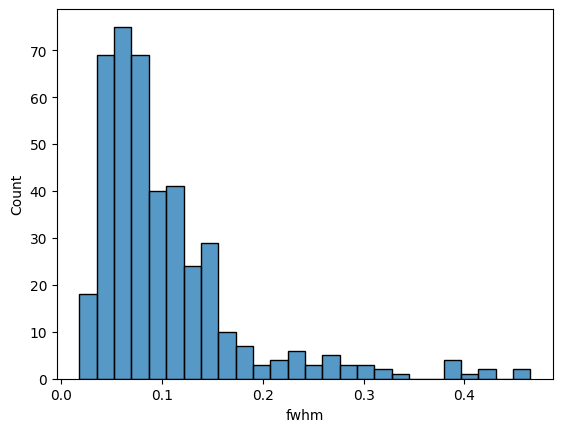

In [27]:
sns.histplot(data = data , x='fwhm')

<AxesSubplot: xlabel='error', ylabel='Count'>

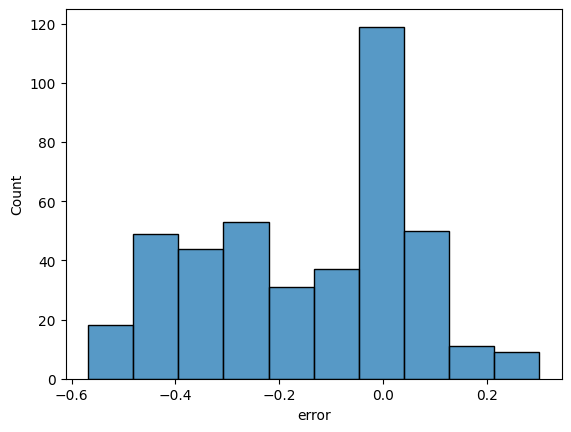

In [28]:
sns.histplot(data = data , x='error')

<AxesSubplot: xlabel='fwhm', ylabel='error'>

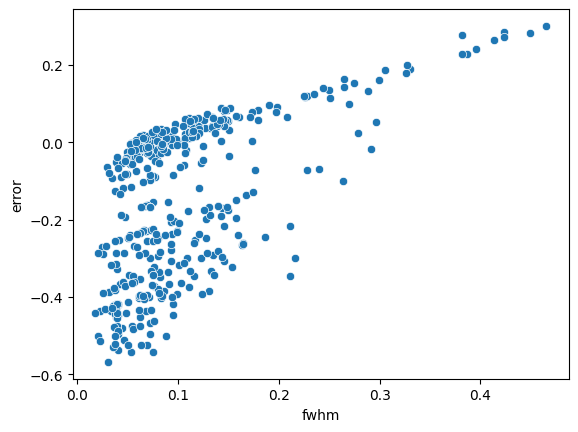

In [29]:
sns.scatterplot(data = data , x='fwhm', y = 'error')

<AxesSubplot: xlabel='fwhm', ylabel='predito'>

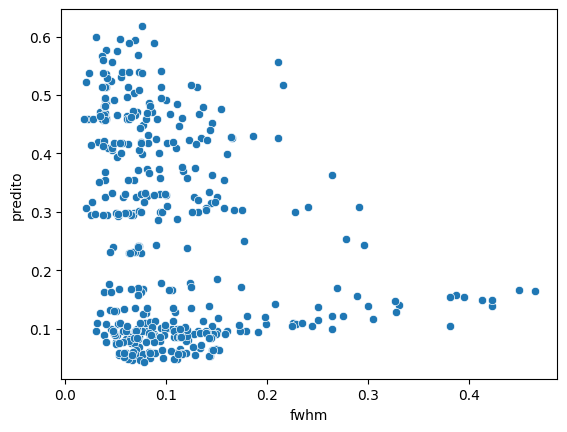

In [30]:
sns.scatterplot(data = data , x='fwhm', y = 'predito')